2712585
[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


<IPython.core.display.Javascript object>


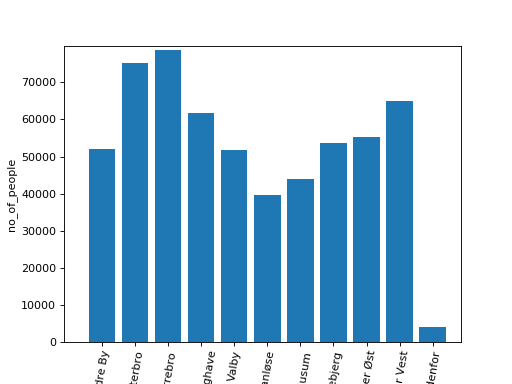

Text(0, 0.5, 'no_of_people')

In [24]:
%matplotlib notebook
import csv
import numpy as np
import matplotlib.pyplot as plt
## 1. Open the file './befkbhalderstatkode.csv'
filename = './befkbhalderstatkode.csv'

## Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

print(data.size) # Test if file is read (OK)

dd = data

## Find out how many people lived in each of the 11 areas in 2015, using this data.

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_in_each_neighborhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # 4 is idex of no of 'PERSONER'
    return sum_of_people
people_mask = (dd[:,0] == 2015)
sum = np.array([number_of_people_in_each_neighborhood(n, people_mask) for n in neighb.keys()])

print(sum)

## 4. Make a bar plot to show the size of each city area from the smallest to the largest

cities = list(neighb.values())
no_of_cities = list(neighb.keys())
no_of_people = list(sum)

plt.bar(cities, sum,  width=0.8, align='center')
plt.axis([0, len(cities) + 1, 0, max(no_of_people) + 1000]) 
plt.xlabel("cities", fontsize=10)
plt.xticks(rotation=80)
plt.ylabel("no_of_people", fontsize=10)